In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [ ]:
!kaggle datasets download -d gaurav2022/mobile-health

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 62% 22.0M/35.5M [00:00<00:00, 114MB/s] 
100% 35.5M/35.5M [00:00<00:00, 118MB/s]


In [ ]:
!unzip mobile-health.zip


Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [ ]:
df = pd.read_csv('mhealth_raw_data.csv')

In [ ]:


unique_activities = df['Activity'].unique()
print(unique_activities)

[ 0  1  2  3  4  6  7  8  9 10 11 12  5]


In [ ]:
unique_activities = df['Activity']
activity_counts = pd.Series(unique_activities).value_counts()
#not balanced
print(activity_counts)

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [ ]:
df.shape

(1215745, 14)

In [ ]:
df.describe()

alx           aly           alz           glx           gly  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean   1.494200e+00 -9.692878e+00 -9.548056e-01 -1.598951e-03 -6.166318e-01   
std    3.826485e+00  4.171303e+00  5.461803e+00  4.912172e-01  3.546406e-01   
min   -2.214600e+01 -1.961900e+01 -1.937300e+01 -2.146600e+00 -7.789900e+00   
25%    1.413100e-01 -1.020100e+01 -2.649400e+00 -4.359900e-01 -8.180100e-01   
50%    1.308900e+00 -9.670300e+00 -1.645600e-02 -1.484200e-02 -7.073200e-01   
75%    2.575800e+00 -9.042200e+00  1.301300e+00  4.489800e-01 -5.403400e-01   
max    2.005400e+01  2.116100e+01  2.501500e+01  6.048400e+01  2.011300e+00   

                glz           arx           ary           arz           grx  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean  -1.587811e-01 -3.713413e+00 -5.805526e+00  2.393880e+00 -2.761061e-01   
std    5.467979e-01  4.763586e+00  5.757639e+00  3.876503e+00  5.276888e-01   
min   -2.626700e+00 -2.236100e+01 -1.897200e+01 -1.823900e+01 -8.339200e+00   
25%   -5.933200e-01 -6.076000e+00 -9.404200e+00  1.296500e-01 -7.058800e-01   
50%   -1.905700e-01 -2.977600e+00 -7.461500e+00  1.928100e+00 -3.549000e-01   
75%    3.222000e-01 -1.193700e+00 -2.533900e+00  4.914700e+00  9.607800e-02   
max    2.770100e+00  1.986400e+01  2.219100e+01  2.574100e+01  3.319600e+00   

                gry           grz      Activity  
count  1.215745e+06  1.215745e+06  1.215745e+06  
mean  -4.664340e-01  2.666335e-01  1.741465e+00  
std    5.555510e-01  5.643804e-01  3.283679e+00  
min   -3.570800e+00 -2.689700e+00  0.000000e+00  
25%   -8.973300e-01 -2.370700e-01  0.000000e+00  
50%   -6.345000e-01  3.017200e-01  0.000000e+00  
75%   -1.067800e-01  7.780200e-01  2.000000e+00  
max    1.556500e+00  2.750000e+00  1.200000e+01

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [ ]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:




null_values = df.isnull().sum()
print("Null values:")
print(null_values)

duplicate_rows = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicate_rows])

df = df.dropna()

df = df.drop_duplicates()



Null values:
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [alx, aly, alz, glx, gly, glz, arx, ary, arz, grx, gry, grz, Activity, subject]
Index: []


In [ ]:
'''getting sample of about 30% of the data'''
'''Balancing the data '''
class_0_df = df[df['Activity'] == 0]
class_2_df = df[df['Activity'] != 0]

class_0_shuffled = class_0_df.sample(frac=1, random_state=42)
class_2_shuffled = class_2_df.sample(frac=1, random_state=42)

class_0_subset = class_0_shuffled.iloc[:35000]
class_2_subset = class_2_shuffled.iloc[:300000]

subset_df = pd.concat([class_0_subset, class_2_subset], ignore_index=True)


subset_df = subset_df.sample(frac=1, random_state=42)

In [ ]:
subset_50=subset_df.sample(50000)

In [ ]:
subset_50.head()

alx      aly      alz      glx      gly      glz     arx     ary  \
221819  1.62480 -10.0560  0.38847  0.50649 -0.61538 -0.53635 -2.3863 -7.8750   
88758  -1.33560  -9.7580 -3.52210 -0.58442 -0.57411 -0.78782 -5.6644 -9.4005   
261667 -0.34969 -10.2920 -3.42430  0.39518 -0.77861  0.33006  4.0183 -7.1390   
158344  0.49950  -9.8284  0.32607  0.60111 -0.81238 -0.53438 -7.1790 -2.8608   
17511  -0.88356 -12.5820  5.18500 -0.44156 -0.12195 -1.00390 -2.3335 -6.5404   

            arz       grx      gry      grz  Activity    subject  
221819  0.50208  0.500000 -0.97536  0.33405         8   subject9  
88758   0.94664 -0.294120 -0.92197 -0.39655         6   subject2  
261667  4.10140  0.898040 -0.32444  0.76724         9   subject9  
158344  5.91950 -0.082353 -0.76386  0.54526         2  subject10  
17511   0.96465  0.492160 -0.58111 -0.84483         0   subject2

In [ ]:
subset_df.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')

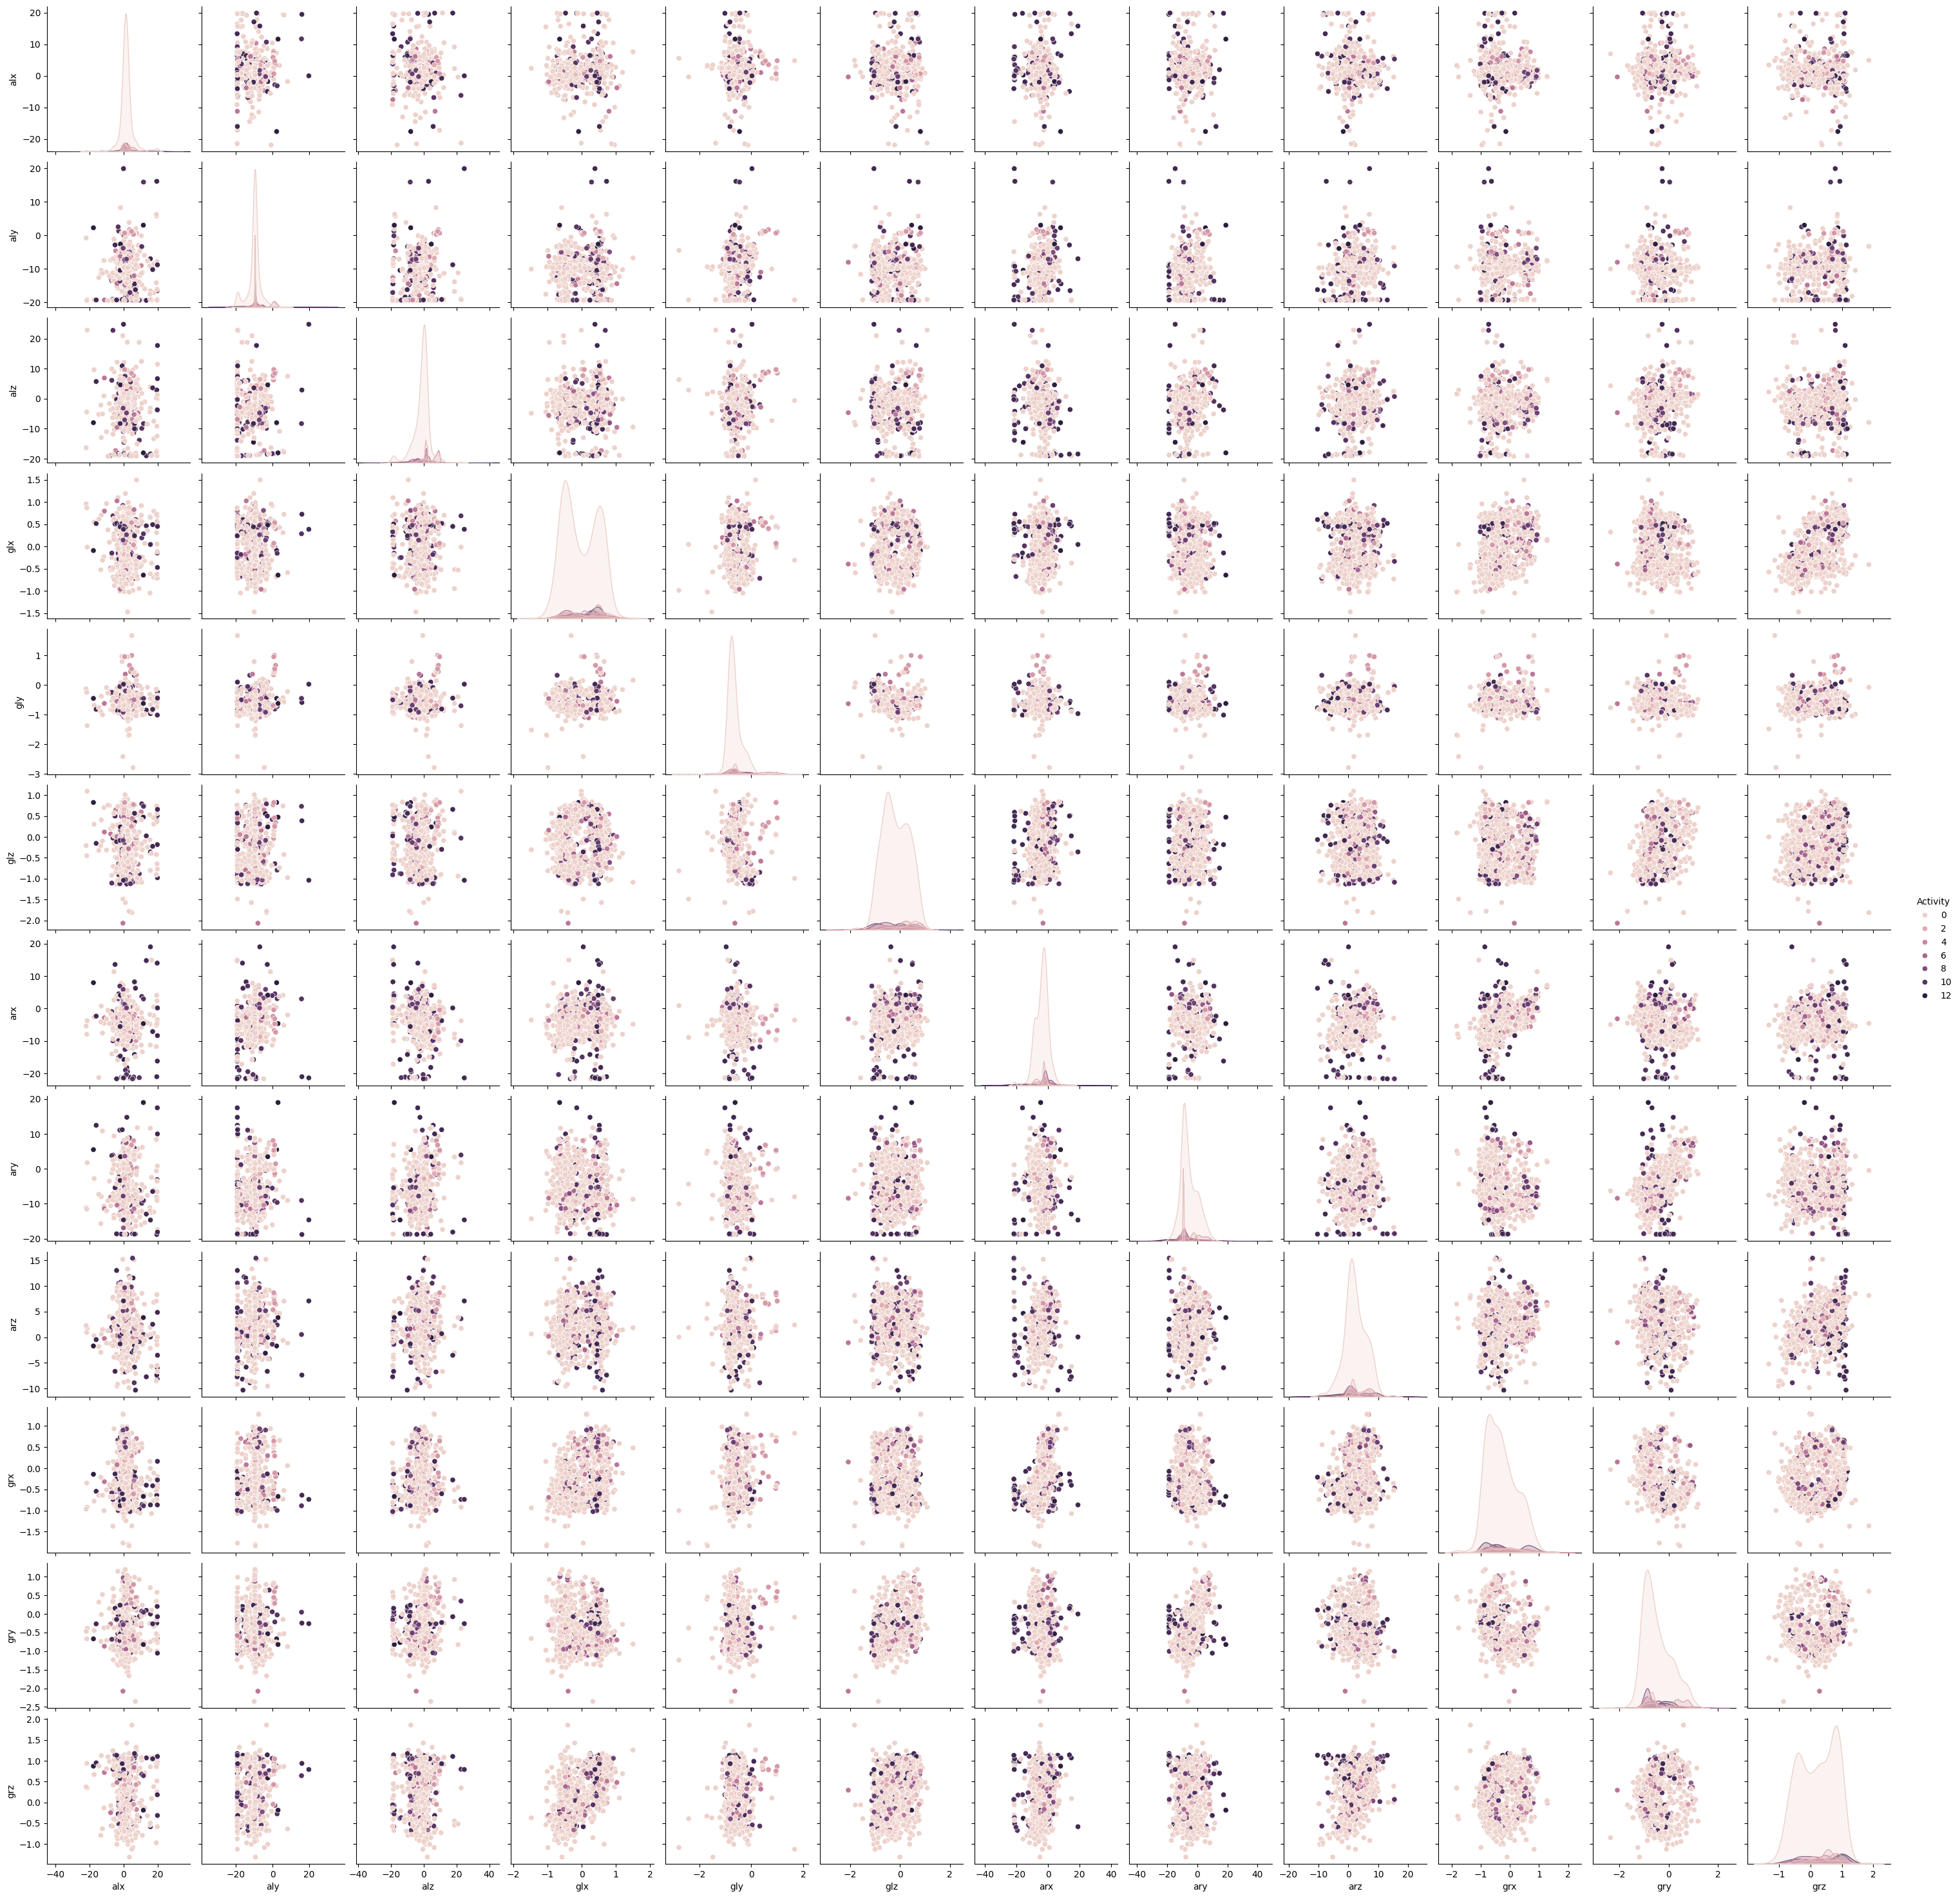

In [ ]:
import seaborn as sns


sample_df = df.sample(n=1000, random_state=42)


sns.pairplot(sample_df, hue='Activity', diag_kind='kde')
plt.show()

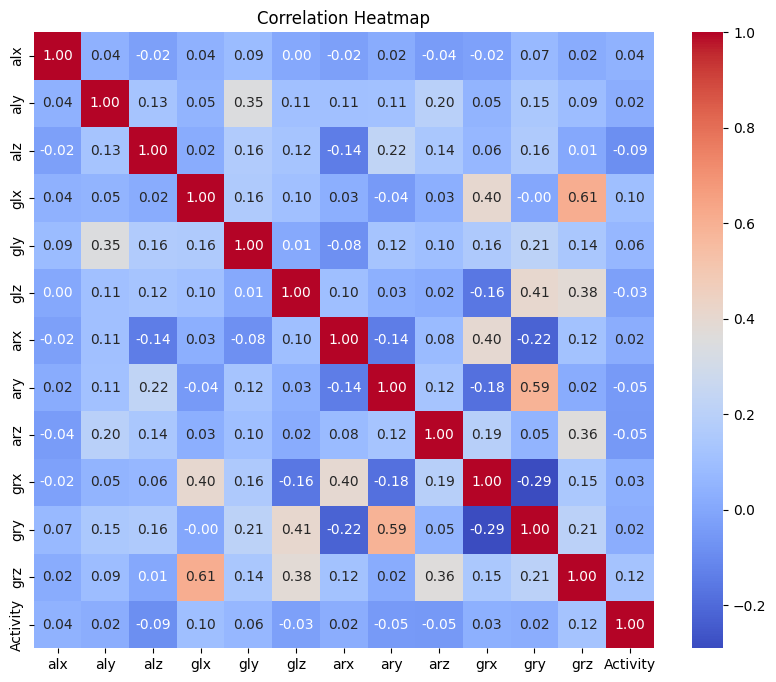

In [ ]:
sample_df = df.sample(n=1000, random_state=42)

numeric_columns = sample_df.select_dtypes(include=['number'])

corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

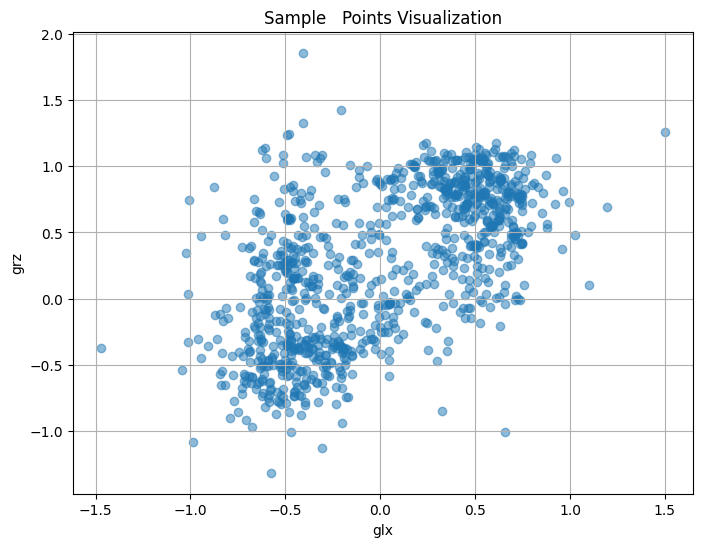

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




sample_df = df.sample(n=1000, random_state=42)
# scatter plot between the most related 2 vars

plt.figure(figsize=(8, 6))
plt.scatter(sample_df['glx'], sample_df['grz'], alpha=0.5)
plt.title('Sample   Points Visualization')
plt.xlabel('glx')
plt.ylabel('grz')
plt.grid(True)
plt.show()


In [ ]:
knn_df = subset_50.copy()

In [ ]:
knn_df.shape

(50000, 14)

In [ ]:
x_t = knn_df.drop(columns=['Activity', 'subject'])
y_t = knn_df['Activity']
X_train, X_test, y_train, y_test = train_test_split( x_t, y_t, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
n1 = 3
first_knn_model = KNeighborsClassifier(n_neighbors=n1)
first_knn_model.fit(X_train_scaled, y_train)
y_predict1 = first_knn_model.predict(X_test_scaled)
acc1 = accuracy_score(y_test, y_predict1)
print("Accuracy of k =", n1, "with normalization is =", acc1 * 100, "%")

n2 = 5
second_knn_model = KNeighborsClassifier(n_neighbors=n2)
second_knn_model.fit(X_train_scaled, y_train)
y_predict2 = second_knn_model.predict(X_test_scaled)
acc2 = accuracy_score(y_test, y_predict2)
print("Accuracy of k =", n2, "with normalization is =", acc2 * 100, "%")

n3 = 7
third_knn_model = KNeighborsClassifier(n_neighbors=n3)
third_knn_model.fit(X_train_scaled, y_train)
y_predict3 = third_knn_model.predict(X_test_scaled)
acc3 = accuracy_score(y_test, y_predict3)
print("Accuracy of k =", n3, "with normalization is =", acc3 * 100, "%")

Accuracy of k = 3 with normalization is = 92.24 %
Accuracy of k = 5 with normalization is = 91.58 %
Accuracy of k = 7 with normalization is = 90.94 %


In [ ]:
print(confusion_matrix(y_test, y_predict2))

[[597  24  22  11 101  39  53  62  59  57  28  15   7]
 [  0 801   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 810   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 794   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0 817   1   0   0   1   0   0   0   0]
 [ 33   0   0   0  35 683   6   2  24   0   3   0   0]
 [  2   3   0   0   1   0 710   8   0   0   0   0   0]
 [ 10   0   0   0   0   0   3 728   0   0   0   0   0]
 [  4   0   0   0   0   0   3   0 777   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 813   0   1   0]
 [  5   0   0   0   5   0   0   1   1   0 690  34   3]
 [  3   0   0   0   6   2   0   0   0   0  43 746   0]
 [ 15   0   0   0  10   2   2   1   3   0  58  25 192]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_predict2, average='weighted')


recall = recall_score(y_test, y_predict2, average='weighted')


f1 = f1_score(y_test, y_predict2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9167304190899367
Recall: 0.9158
F1-score: 0.909780193124769


In [ ]:
from sklearn.model_selection import StratifiedKFold


neighbors = [3, 5, 7]


skf = StratifiedKFold(n_splits=100)


for n in neighbors:
    total_accuracy = 0


    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]


        knn_model = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(X_train_fold, y_train_fold)


        val_predictions = knn_model.predict(X_val_fold)
        fold_accuracy = accuracy_score(y_val_fold, val_predictions)


        total_accuracy += fold_accuracy

    average_accuracy = total_accuracy / skf.n_splits


    print("Average accuracy of k =", n, "with normalization is =", average_accuracy * 100, "%")


Average accuracy of k = 3 with normalization is = 92.50250000000003 %
Average accuracy of k = 5 with normalization is = 91.82000000000001 %
Average accuracy of k = 7 with normalization is = 91.2275 %


In [ ]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=10)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)


Accuracy: 0.9254


In [ ]:


X_train_df = pd.DataFrame(X_train_scaled)
y_train_df = pd.Series(y_train)


X_train_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

X_train_reset_index = X_train_df.to_numpy()
y_train_reset_index = y_train_df.to_numpy()


svm_model = SVC(kernel='rbf', gamma=0.1, C=10)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = []


for train_index, test_index in skf.split(X_train_reset_index, y_train_reset_index):
    X_train_cv, X_test_cv = X_train_reset_index[train_index], X_train_reset_index[test_index]
    y_train_cv, y_test_cv = y_train_reset_index[train_index], y_train_reset_index[test_index]


    svm_model.fit(X_train_cv, y_train_cv)


    y_pred_cv = svm_model.predict(X_test_cv)


    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
    accuracy_scores.append(accuracy_cv)


mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.9235749999999999


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred_svm, average='weighted')


recall = recall_score(y_test, y_pred_svm, average='weighted')


f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8658804400680041
Recall: 0.827
F1-score: 0.8267395958319163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

[[ 95   7   5   1   4   1   6   3   9   1   0  53   0]
 [  0 169   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 137   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0 125   0   0   0   0   0   1  23   0]
 [ 15   0   0   0   2  82   0   0   0   0   0  61   0]
 [  5   2   0   0   0   0 158   1   1   0   0   0   0]
 [  4   0   0   0   0   0   1 128   0   0   0   0   0]
 [  5   0   0   0   1   1   0   0 157   0   0   2   0]
 [  7   0   0   0   0   0   0   0   0 171   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0 121  53   0]
 [  0   0   0   0   0   0   0   0   0   0   3 156   0]
 [  2   0   0   0   0   0   0   0   0   0   0  53   0]]


In [ ]:

# this is not an error I entrupted the cell due to large time
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10, 20]
gamma_values = [0.1,0.5,1,2]
for kernel in kernels:
    for C in C_values:
      for gamma in gamma_values:

          svm_model = SVC(kernel=kernel, C=C,gamma=gamma)
          svm_model.fit(X_train_scaled, y_train)

          y_pred_svm = svm_model.predict(X_test_scaled)
          accuracy = accuracy_score(y_test, y_pred_svm)
          print(f"Accuracy with {kernel} kernel and C={C} and gamma={gamma}:  {accuracy:.2f} ")

Accuracy with linear kernel and C=0.1 and gamma=0.1:  0.65 
Accuracy with linear kernel and C=0.1 and gamma=0.5:  0.65 
Accuracy with linear kernel and C=0.1 and gamma=1:  0.65 
Accuracy with linear kernel and C=0.1 and gamma=2:  0.65 


KeyboardInterrupt: 

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

y_train_array = np.array(y_train)
y_test_array = np.array(y_test)


y_train_reshaped = y_train_array.reshape(-1, 1)
y_test_reshaped = y_test_array.reshape(-1, 1)


y_train_encoded = onehot_encoder.fit_transform(y_train_reshaped)
y_test_encoded = onehot_encoder.transform(y_test_reshaped)



model = Sequential([
    Dense(units=32, activation="sigmoid", input_shape=(12,)),
    Dense(units=64, activation="relu"),
    Dropout(0.5),
    Dense(units=128, activation="relu"),
    Dense(units=13, activation="softmax")
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), epochs=500)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5840 - accuracy: 0.4491 - val_loss: 1.1520 - val_accuracy: 0.5982
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2036 - accuracy: 0.5762 - val_loss: 0.9509 - val_accuracy: 0.6520
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0508 - accuracy: 0.6307 - val_loss: 0.8311 - val_accuracy: 0.7058
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9534 - accuracy: 0.6650 - val_loss: 0.7682 - val_accuracy: 0.7280
Epoch 5/500
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8895 - accuracy: 0.6902 - val_loss: 0.6792 - val_accuracy: 0.7739
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8395 - accuracy: 0.7071 - val_loss: 0.6451 - val_accuracy: 0.7811
Epoch 7/500
1250/1250 [==============================] - 3s 3ms/step - loss: 0.7993 - accuracy: 0.7202 - val_loss: 0.5960 - val_ac

In [ ]:
def visualize_performance(n_epochs, acc, val_acc, loss, val_loss):
  %matplotlib inline
  epochs = np.arange(n_epochs)
  acc = np.array(acc)
  val_acc = np.array(val_acc)
  loss = np.array(loss)
  val_loss = np.array(val_loss)
  plt.plot(epochs, acc*100, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc*100, 'b', label='Validation accuracy')
  plt.scatter(epochs[val_acc.argmax()], val_acc.max()*100, color='green', s=70)
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

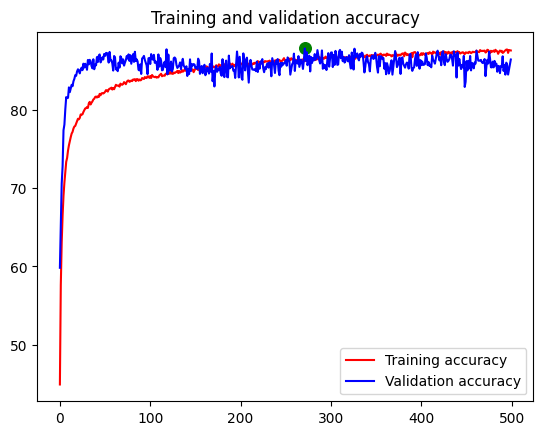

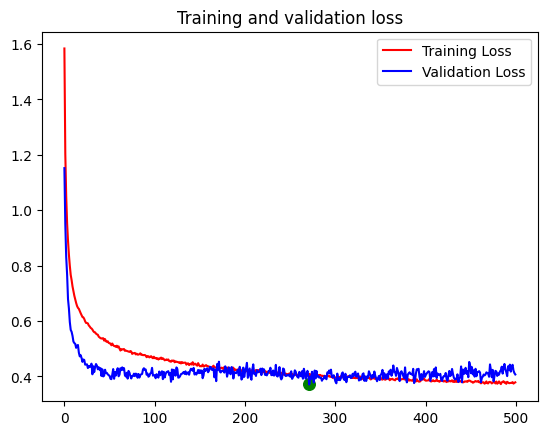

In [ ]:
visualize_performance(500, history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"])

In [ ]:
print(max(history.history["accuracy"]))
print(max(history.history["val_accuracy"]))


0.8769500255584717
0.8783000111579895


In [ ]:
print("Contents of y_pred:", y_pred)


Contents of y_pred: [10  3  8 ...  9  4  3]


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)




precision = precision_score(y_test, test_predictions, average='weighted')


recall = recall_score(y_test, test_predictions, average='weighted')


f1 = f1_score(y_test, test_predictions, average='weighted')



train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


print("Confusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training MSE: 12.216825
Testing MSE: 12.3686
Training RMSE: 3.4952575012436493
Testing RMSE: 3.5169020458352263
Precision: 0.5335616312560434
Recall: 0.5539
F1-score: 0.5340108846408643
Training Accuracy: 0.550425
Testing Accuracy: 0.5539
Confusion Matrix:
[[112 121 111  18 117  28 112  78  98 107 110  62   1]
 [ 27 555   0   0  79   0  86   0  54   0   0   0   0]
 [152   0 431   0   0  80   0  69   0  78   0   0   0]
 [  0   0   0 794   0   0   0   0   0   0   0   0   0]
 [ 36  90   0   0 440  78  35   0 112   0   5  26   1]
 [151  51  26   2 166 181  44  17  99  14  14  19   2]
 [ 63 161   0   0  17   1 400   2  80   0   0   0   0]
 [ 32  92  73   9  34   1  36 431   0  29   1   3   0]
 [ 63  45   0   0  44  68 102   0 445   2  11   4   0]
 [ 15   0   0   0   3   0   0  11  32 754   0   0   0]
 [ 45   0  48   1   4   6   2  13  11   0 468 129  12]
 [ 21   0  78   6  23  26  12  24  19   2  74 509   6]
 [ 26   6  29   2  14   2  10  23  20   5  98  54  19]]


In [ ]:


degree = 4


poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_poly, y_train)


y_pred = logistic_regression_model.predict(X_test_poly)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8879
Precision: 0.8841863356304702
Recall: 0.8879
F1-score: 0.883736629197758
Confusion Matrix:
[[586  42  28  11  69  59  45  36  82  58  28  10  21]
 [  0 800   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0 810   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 794   0   0   0   0   0   0   0   0   0]
 [ 24  28   0   0 754   8   3   0   4   0   0   1   1]
 [ 49   2   0   0  39 667   7   1  19   0   0   0   2]
 [ 22  26   0   0   1   3 631  12  29   0   0   0   0]
 [ 14  13   0   0   0   0  33 663  18   0   0   0   0]
 [ 20  13   0   0   3   5  10   5 728   0   0   0   0]
 [ 17   0   0   0   0   0   0   1   0 796   0   0   1]
 [ 27   0   0   0   0   0   0   2   0   0 680  23   7]
 [ 24   0   0   0   0   0   0   0   0   1  37 731   7]
 [ 23   0   0   0   3   4   1   0   0   0  26  12 239]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
